In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import mnist


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

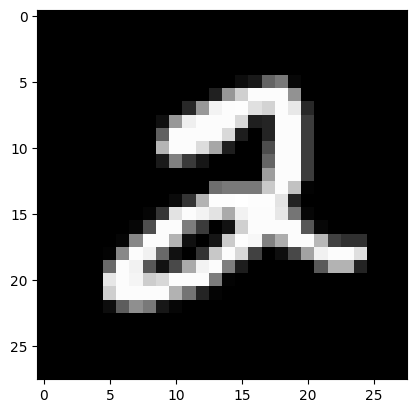

In [67]:
plt.imshow(x_train[5], cmap = "gray")

In [4]:
model = tf.keras.Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8824 - loss: 0.3822 - val_accuracy: 0.9804 - val_loss: 0.0619
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9817 - loss: 0.0586 - val_accuracy: 0.9846 - val_loss: 0.0521
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9896 - loss: 0.0347 - val_accuracy: 0.9870 - val_loss: 0.0431
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9885 - val_loss: 0.0413
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9927 - loss: 0.0221 - val_accuracy: 0.9898 - val_loss: 0.0381
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9944 - loss: 0.0166 - val_accuracy: 0.9887 - val_loss: 0.0440
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9877 - val_loss: 0.0574


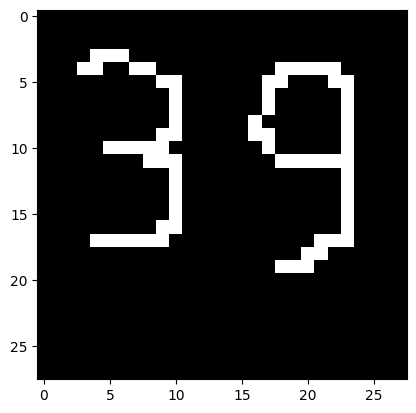

In [144]:
img = cv2.imread("number2.png", cv2.IMREAD_GRAYSCALE)
img = ~img
plt.imshow(img, cmap = "gray")


In [145]:
_, img_tresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
image_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
# plt.imshow(img_tresh, cmap = "gray")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [146]:


digits = []
for i in contours:
    x, y, w, h = cv2.boundingRect(i)


    digit = img_tresh[y-1:y+h+1, x-1:x+w+1]
    digit = cv2.resize(digit, (28, 28))
    digit = digit / 255
    digit = digit.reshape(1, 28, 28, 1)
    digits.append(digit)

In [147]:
number = []
for i in digits:
  pred = model.predict(i)
  number.append(str(np.argmax(pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [148]:
res = "".join(number)

In [149]:
res

'35'